In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # graphing
import seaborn as sns # graphing
import missingno as msno
from scipy.stats import zscore

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-airbnb-listings-march-2023/London_Airbnb_Listings_March_2023.csv


we create a variable with the csv file read

In [2]:
df= pd.read_csv("/kaggle/input/london-airbnb-listings-march-2023/London_Airbnb_Listings_March_2023.csv")
df.head()

,name,host_name,latitude,longitude,host_since,host_location,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating
0,Lovely private bedroom in Muswell Hill.,Forough,51.597280,-0.139330,2015-07-20,"London, United Kingdom",NaN,Private room in condo,Private room,$100.00,1,365,30,365,0,NaN
1,Studio Flat Franklin London,Hussein,51.636518,-0.177475,2023-01-14,"London, United Kingdom",100%,Entire rental unit,Entire home/apt,$65.00,180,365,30,365,0,NaN
2,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Paul,51.608180,-0.277400,2020-01-08,NaN,91%,Entire rental unit,Entire home/apt,$132.00,2,28,12,35,0,NaN
3,Wimbledon Double Bedroom Ensuite,Nikki,51.422310,-0.188410,2010-08-01,"London, United Kingdom",100%,Private room in rental unit,Private room,$100.00,5,1125,30,365,4,3.67
4,Stunning Apartment 2 minutes walk to Tube Station,Joseph,51.602282,-0.193606,2014-12-22,NaN,46%,Entire condo,Entire home/apt,$120.00,5,90,23,337,0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75241 entries, 0 to 75240
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  75210 non-null  object 
 1   host_name             75235 non-null  object 
 2   latitude              75241 non-null  float64
 3   longitude             75241 non-null  float64
 4   host_since            75236 non-null  object 
 5   host_location         59934 non-null  object 
 6   host_acceptance_rate  51028 non-null  object 
 7   property_type         75241 non-null  object 
 8   room_type             75241 non-null  object 
 9   price                 75241 non-null  object 
 10  minimum_nights        75241 non-null  int64  
 11  maximum_nights        75241 non-null  int64  
 12  availability_30       75241 non-null  int64  
 13  availability_365      75241 non-null  int64  
 14  number_of_reviews     75241 non-null  int64  
 15  review_scores_ratin

Now we need to find how many values are missing. df.describe() can help us. 
Ok maybe the review_scores_raiting is missing some values. 

In [4]:
df.describe()

,latitude,longitude,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating
count,75241.000000,75241.000000,75241.000000,7.524100e+04,75241.000000,75241.000000,75241.000000,56548.000000
mean,51.509708,-0.128108,5.750748,7.790300e+03,7.525963,113.073896,17.974668,4.588159
std,0.048369,0.099341,24.240947,1.914055e+06,10.258593,132.687784,41.984021,0.779083
min,51.295937,-0.497800,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,51.483540,-0.189390,1.000000,4.200000e+01,0.000000,0.000000,1.000000,4.500000
50%,51.513840,-0.126280,2.000000,3.650000e+02,0.000000,47.000000,4.000000,4.820000
75%,51.539450,-0.068460,4.000000,1.125000e+03,13.000000,228.000000,17.000000,5.000000
max,51.681142,0.288570,1125.000000,5.248556e+08,30.000000,365.000000,1328.000000,5.000000


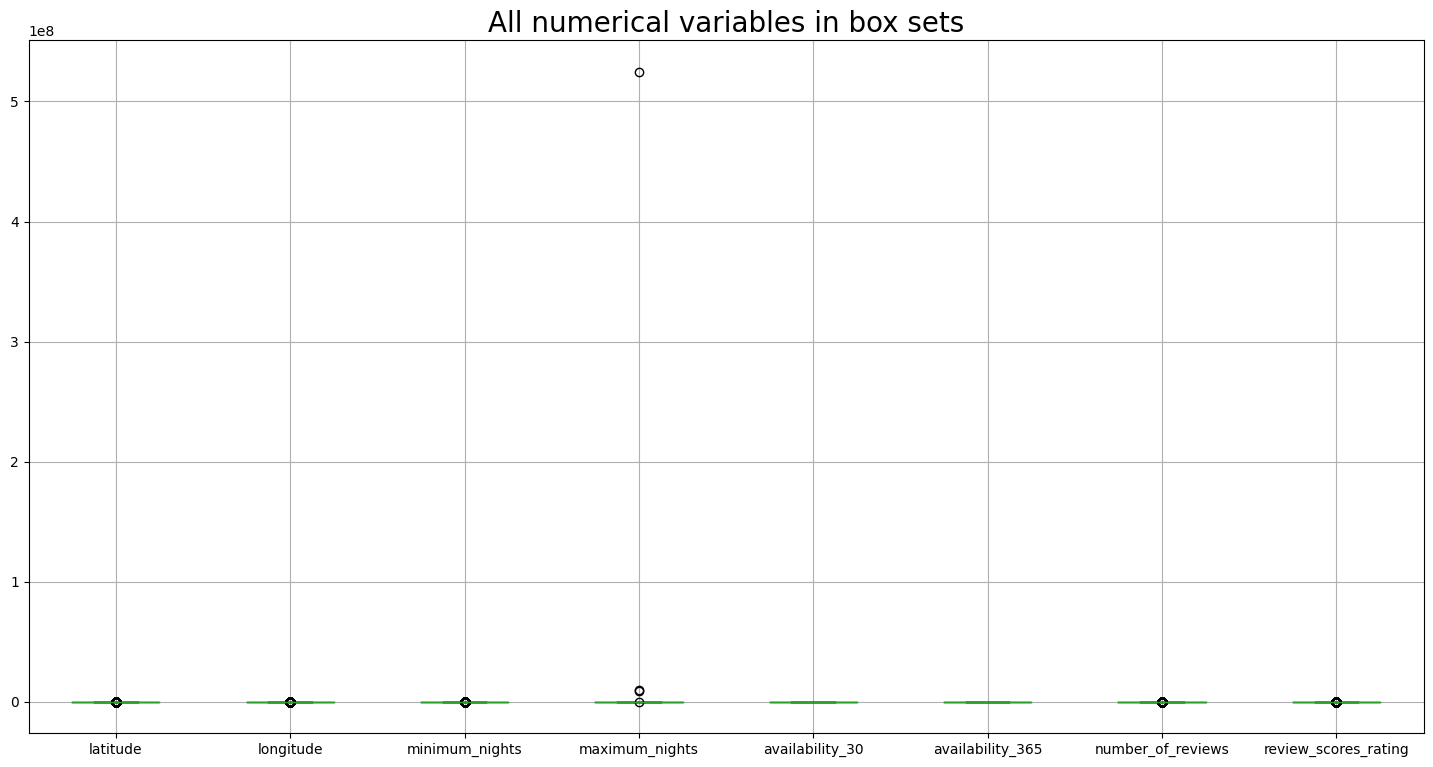

In [5]:
columns=['latitude','longitude','minimum_nights','maximum_nights','availability_30','availability_365','number_of_reviews','review_scores_rating']
plt.figure(figsize=(18,9))
df[columns].boxplot()
plt.title("All numerical variables in box sets",fontsize=20)
plt.show()

We should thus calculate the zscore of each value to see which ones are outliers 

In [6]:
df['zscore(max)']=zscore(df['maximum_nights'])
df['zscore(min)']=zscore(df['minimum_nights'])
df['zscore(reviews)']=zscore(df['number_of_reviews'])

df.head(5)

,name,host_name,latitude,longitude,host_since,host_location,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,zscore(max),zscore(min),zscore(reviews)
0,Lovely private bedroom in Muswell Hill.,Forough,51.597280,-0.139330,2015-07-20,"London, United Kingdom",NaN,Private room in condo,Private room,$100.00,1,365,30,365,0,NaN,-0.003879,-0.195982,-0.428134
1,Studio Flat Franklin London,Hussein,51.636518,-0.177475,2023-01-14,"London, United Kingdom",100%,Entire rental unit,Entire home/apt,$65.00,180,365,30,365,0,NaN,-0.003879,7.188268,-0.428134
2,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Paul,51.608180,-0.277400,2020-01-08,NaN,91%,Entire rental unit,Entire home/apt,$132.00,2,28,12,35,0,NaN,-0.004055,-0.154729,-0.428134
3,Wimbledon Double Bedroom Ensuite,Nikki,51.422310,-0.188410,2010-08-01,"London, United Kingdom",100%,Private room in rental unit,Private room,$100.00,5,1125,30,365,4,3.67,-0.003482,-0.030970,-0.332859
4,Stunning Apartment 2 minutes walk to Tube Station,Joseph,51.602282,-0.193606,2014-12-22,NaN,46%,Entire condo,Entire home/apt,$120.00,5,90,23,337,0,NaN,-0.004023,-0.030970,-0.428134


Then we eliminate each row that has a zscore of over 3 or under -3. This is going to help us later with the fitting and scailing. 

In [7]:
mask = (df['zscore(max)'] <= 3) & (df['zscore(max)'] >= -3) & (df['zscore(min)'] <= 3) & (df['zscore(min)'] >= -3)& (df['zscore(reviews)'] <= 3) & (df['zscore(reviews)'] >= -3)
# Apply the mask to the DataFrame to filter out rows
df = df[mask]

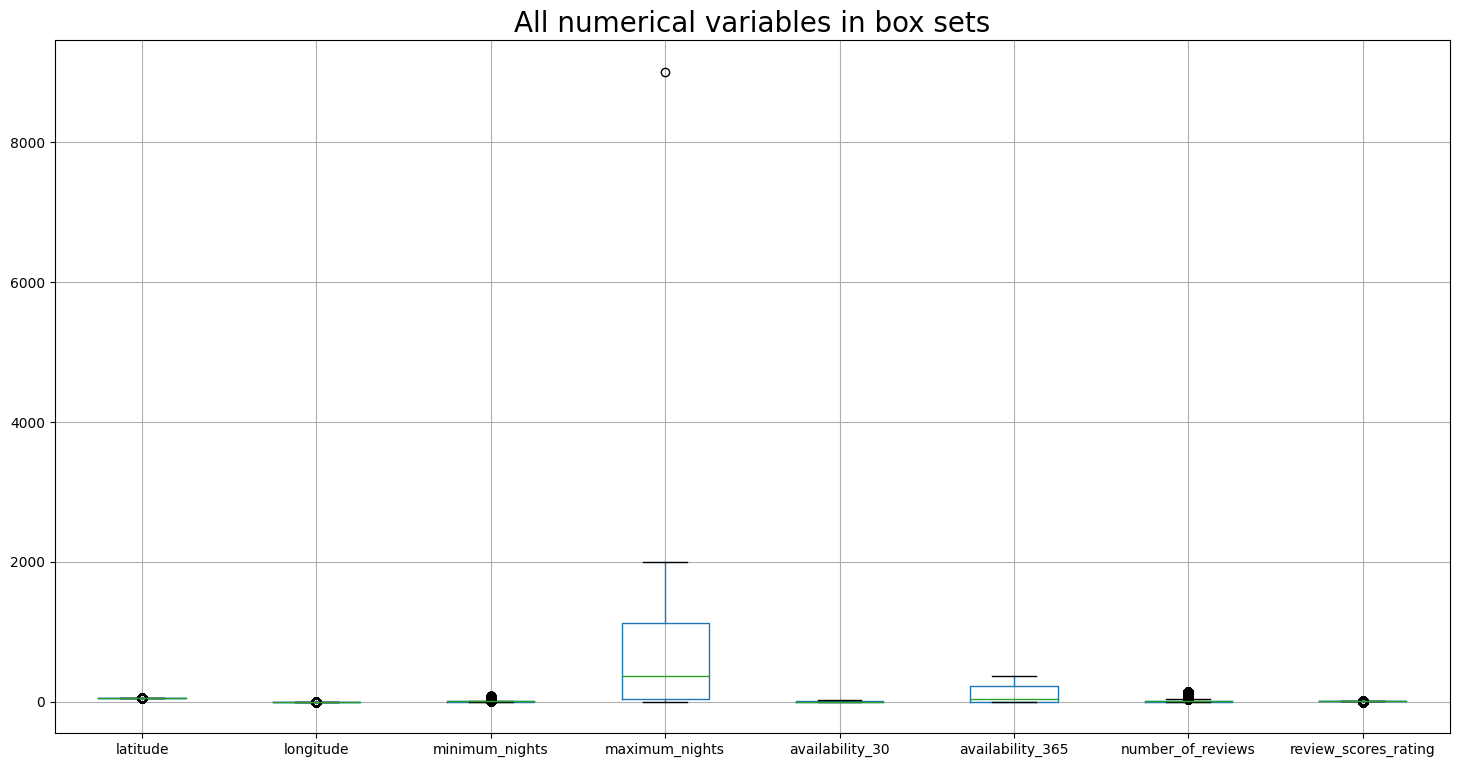

In [8]:

columns=['latitude','longitude','minimum_nights','maximum_nights','availability_30','availability_365','number_of_reviews','review_scores_rating']
plt.figure(figsize=(18,9))
df[columns].boxplot()
plt.title("All numerical variables in box sets",fontsize=20)
plt.show()

We have some outliers in the maxium_nights column.
Alright, a missing value is denoted NAN in pandas. 
Thus, we need to search the data set to find the percentage of NAN values in each column or category. 

In [9]:
# Check the percentage of Nan in dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df['name'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
host_acceptance_rate,23774,0.326526
review_scores_rating,18375,0.252373
host_location,15044,0.206623
name,28,0.000385
host_name,6,0.000082
host_since,5,0.000069
availability_30,0,0.000000
zscore(min),0,0.000000
zscore(max),0,0.000000
number_of_reviews,0,0.000000


Ah, ok so we have a large percent of missing data in "host_acceptance_rate" ,in "review_scores_rating" and in "host_location".

Now we should try to account for this missing data.

Just some more data visualization(Not needed necessarily) 

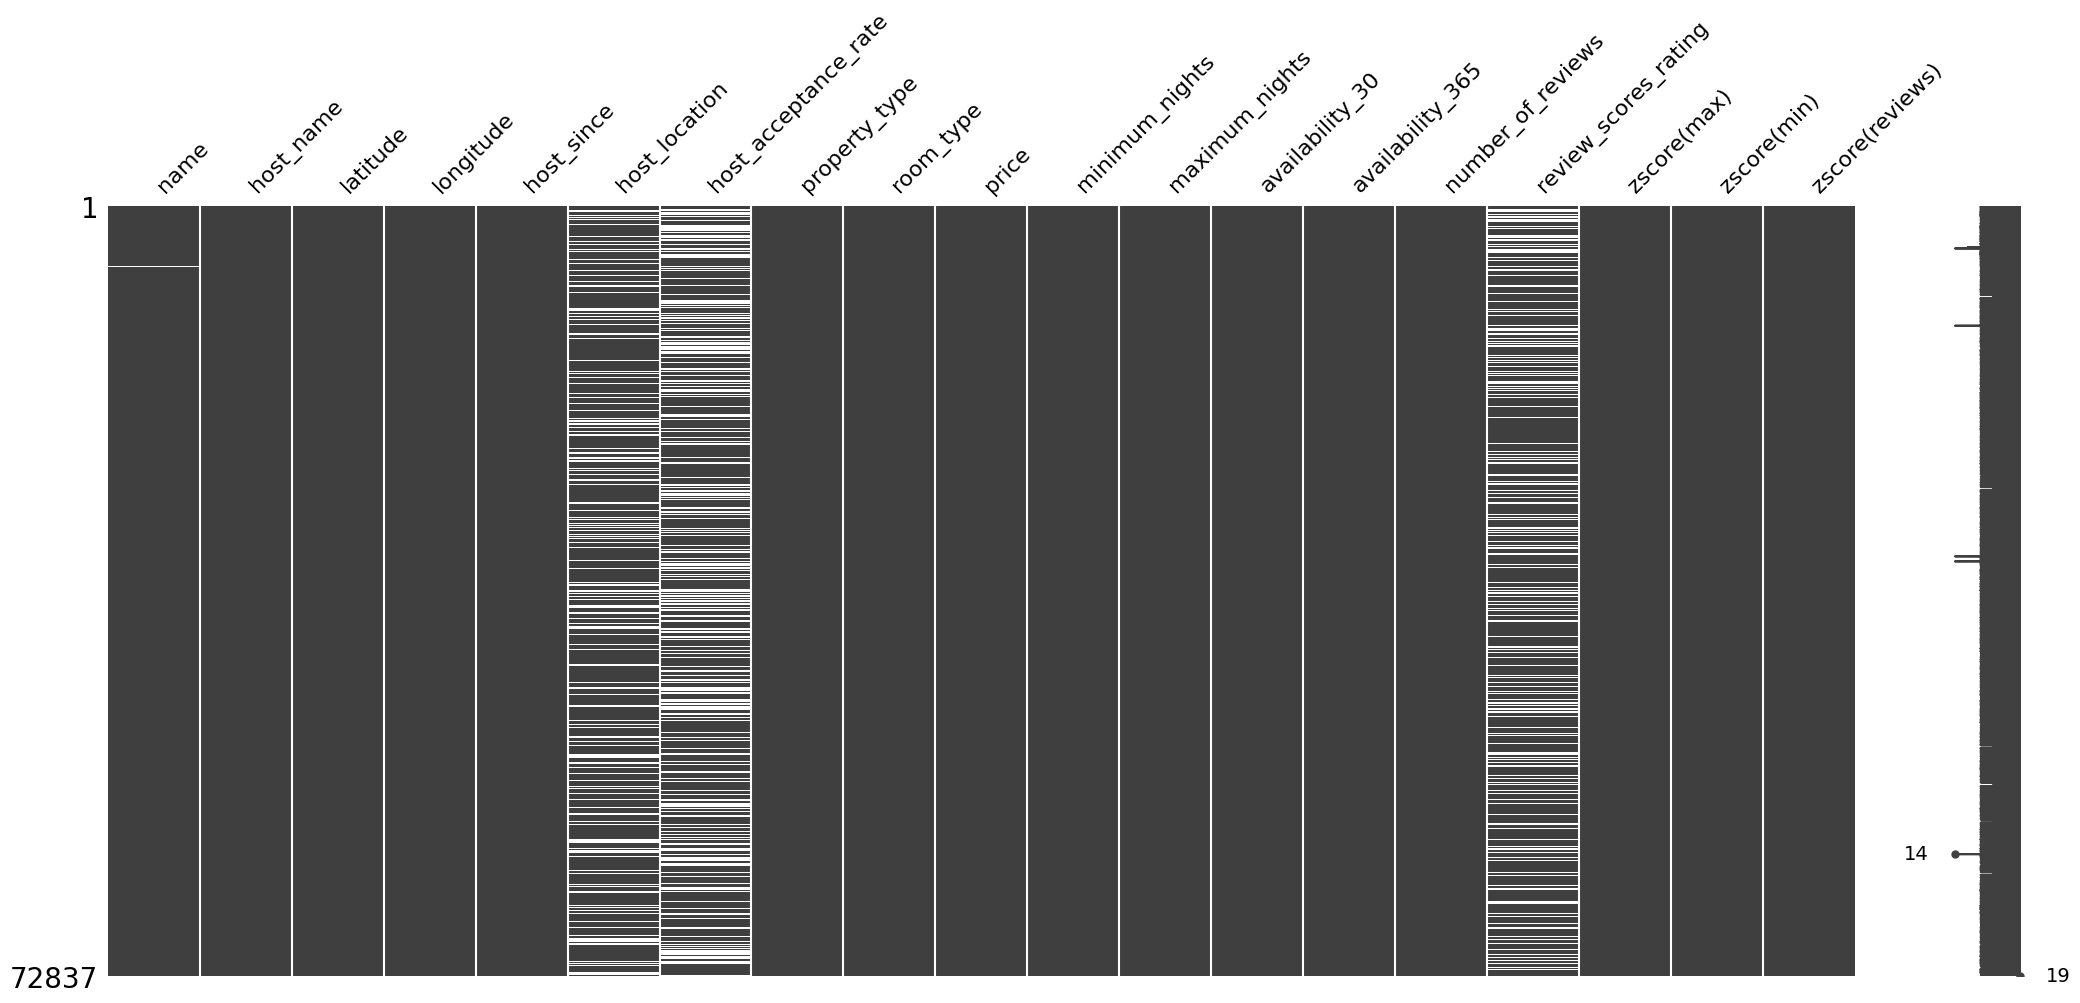

<Figure size 1500x900 with 0 Axes>

In [10]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

Now we want to see how many unique values we have inside the data set 

In [11]:
for b in ["latitude", "longitude", "host_location", "property_type", "room_type", "price", "minimum_nights", "maximum_nights", "availability_30", "availability_365", "number_of_reviews"]:
    print('----%s----' % b)
    print(df[b].value_counts())

----latitude----
latitude
51.517040    29
51.494267    25
51.510468    22
51.511220    21
51.513700    20
             ..
51.500430     1
51.457174     1
51.467358     1
51.611180     1
51.543923     1
Name: count, Length: 30220, dtype: int64
----longitude----
longitude
-0.260087    29
-0.136603    25
-0.075284    22
-0.129980    17
-0.201190    15
             ..
 0.010500     1
-0.060642     1
-0.360560     1
-0.234090     1
-0.012730     1
Name: count, Length: 39866, dtype: int64
----host_location----
host_location
London, United Kingdom             41104
England, United Kingdom             9730
United Kingdom                       638
Paris, France                        222
New York, NY                         126
                                   ...  
Capel Isaac, United Kingdom            1
Brecon, United Kingdom                 1
Batley, United Kingdom                 1
Compton Valence, United Kingdom        1
Grand Forks, ND                        1
Name: count, Length: 1539

Looking at this code we can deduce many things such as where the majority of air bnbs are listed, the average price, the average night stay etc... Although this isnt essential for building our code, it is very helpful for understanding our collective data as a whole. 


Little note here that the heatmap does NOT take string values so we need to replace every string value with ''. We also have to exclude the columns that just dont have integers such as the name of the air bnb. 

<Axes: >

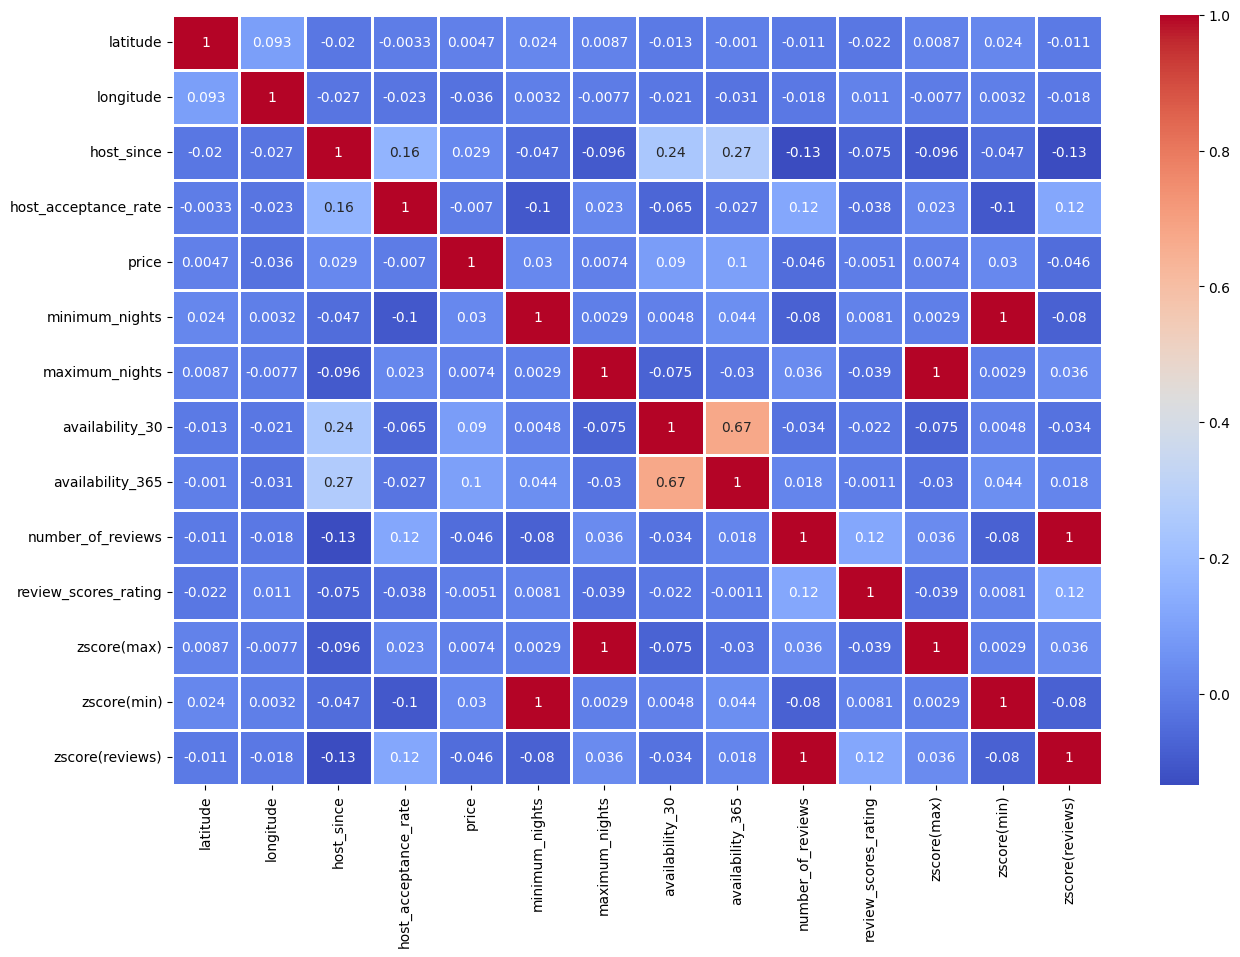

In [12]:
columns_to_exclude = ['name','host_name','host_location','property_type','room_type']  # List of columns to exclude

# Create a new DataFrame without the excluded columns
df_subset = df.drop(columns=columns_to_exclude)

df_subset['host_since']=pd.Series(df_subset['host_since'].str.replace('-','',regex=True))
df_subset['host_acceptance_rate']=pd.Series(df_subset['host_acceptance_rate'].str.replace('%','',regex=True))
df_subset['price']=pd.Series(df_subset['price'].str.replace('$','',regex=False))
df_subset['price']=pd.Series(df_subset['price'].str.replace(',','',regex=False))
fig, ax = plt.subplots()
fig.set_size_inches (15, 10)
sns.heatmap(df_subset.corr(),cmap="coolwarm",ax=ax,annot=True,linewidths=2)


In [13]:
df.isnull().sum()

name                       28
host_name                   6
latitude                    0
longitude                   0
host_since                  5
host_location           15044
host_acceptance_rate    23774
property_type               0
room_type                   0
price                       0
minimum_nights              0
maximum_nights              0
availability_30             0
availability_365            0
number_of_reviews           0
review_scores_rating    18375
zscore(max)                 0
zscore(min)                 0
zscore(reviews)             0
dtype: int64

We thus have to replace review_score_rating, host_acceptance_rate, host_location and name with the average. 

In [14]:
df['host_since']=pd.Series(df['host_since'].str.replace('-','',regex=True))
df['host_acceptance_rate']=pd.Series(df['host_acceptance_rate'].str.replace('%','',regex=True))
df['price']=pd.Series(df['price'].str.replace('$','',regex=False))
df['price']=pd.Series(df['price'].str.replace(',','',regex=False))

meanS=df.review_scores_rating.mean()
df["review_scores_rating"]=np.where(pd.isnull(df.review_scores_rating), meanS,df["review_scores_rating"])

df.isnull().sum()

name                       28
host_name                   6
latitude                    0
longitude                   0
host_since                  5
host_location           15044
host_acceptance_rate    23774
property_type               0
room_type                   0
price                       0
minimum_nights              0
maximum_nights              0
availability_30             0
availability_365            0
number_of_reviews           0
review_scores_rating        0
zscore(max)                 0
zscore(min)                 0
zscore(reviews)             0
dtype: int64

In [15]:
df["host_acceptance_rate"]=df["host_acceptance_rate"].astype(float)
meanNS=df.host_acceptance_rate.mean()
df["host_acceptance_rate"]=np.where(pd.isnull(df.host_acceptance_rate), meanNS,df["host_acceptance_rate"])

df.isnull().sum()

name                       28
host_name                   6
latitude                    0
longitude                   0
host_since                  5
host_location           15044
host_acceptance_rate        0
property_type               0
room_type                   0
price                       0
minimum_nights              0
maximum_nights              0
availability_30             0
availability_365            0
number_of_reviews           0
review_scores_rating        0
zscore(max)                 0
zscore(min)                 0
zscore(reviews)             0
dtype: int64

We must then transform our host locatiob values into numbers using label encoder and fit trasform 

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["host_location"] = le.fit_transform(df.host_location)
df["property_type"] = le.fit_transform(df.property_type)
df["room_type"] = le.fit_transform(df.room_type)
df.head()

,name,host_name,latitude,longitude,host_since,host_location,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,zscore(max),zscore(min),zscore(reviews)
0,Lovely private bedroom in Muswell Hill.,Forough,51.597280,-0.139330,20150720,804,83.642745,39,2,100.00,1,365,30,365,0,4.584313,-0.003879,-0.195982,-0.428134
2,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Paul,51.608180,-0.277400,20200108,1539,91.000000,19,0,132.00,2,28,12,35,0,4.584313,-0.004055,-0.154729,-0.428134
3,Wimbledon Double Bedroom Ensuite,Nikki,51.422310,-0.188410,20100801,804,100.000000,55,2,100.00,5,1125,30,365,4,3.670000,-0.003482,-0.030970,-0.332859
4,Stunning Apartment 2 minutes walk to Tube Station,Joseph,51.602282,-0.193606,20141222,1539,46.000000,11,0,120.00,5,90,23,337,0,4.584313,-0.004023,-0.030970,-0.428134
5,Cosy room with own bathroom,Ekaterina,51.416047,-0.174299,20230212,1539,100.000000,55,2,43.00,1,365,20,278,3,4.670000,-0.003879,-0.195982,-0.356678


We need to then replace the missing values and the 1539 values with the MEDIAN 

In [17]:
medianNS=df.host_since.median()
value_to_replace = 1539

# Calculate the median of the "host_location" column, excluding the value to replace
median_value = np.median(df[df['host_location'] != value_to_replace]['host_location'])

# Replace the specific value with the calculated median
df['host_location'] = df['host_location'].replace(value_to_replace, median_value)
df["host_since"]=np.where(pd.isnull(df.host_since), medianNS,df["host_since"])
df.isnull().sum()

name                    28
host_name                6
latitude                 0
longitude                0
host_since               0
host_location            0
host_acceptance_rate     0
property_type            0
room_type                0
price                    0
minimum_nights           0
maximum_nights           0
availability_30          0
availability_365         0
number_of_reviews        0
review_scores_rating     0
zscore(max)              0
zscore(min)              0
zscore(reviews)          0
dtype: int64

Now we need to retransfrom these values into strings

In [18]:
for col in ["name", "host_name"]:
    del df[col]
df.head()

,latitude,longitude,host_since,host_location,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,zscore(max),zscore(min),zscore(reviews)
0,51.597280,-0.139330,20150720,804,83.642745,39,2,100.00,1,365,30,365,0,4.584313,-0.003879,-0.195982,-0.428134
2,51.608180,-0.277400,20200108,804,91.000000,19,0,132.00,2,28,12,35,0,4.584313,-0.004055,-0.154729,-0.428134
3,51.422310,-0.188410,20100801,804,100.000000,55,2,100.00,5,1125,30,365,4,3.670000,-0.003482,-0.030970,-0.332859
4,51.602282,-0.193606,20141222,804,46.000000,11,0,120.00,5,90,23,337,0,4.584313,-0.004023,-0.030970,-0.428134
5,51.416047,-0.174299,20230212,804,100.000000,55,2,43.00,1,365,20,278,3,4.670000,-0.003879,-0.195982,-0.356678


In [19]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Specify the columns you want to normalize (all numeric columns in this example)
numeric_columns = ['latitude','longitude','host_acceptance_rate','host_since','minimum_nights','maximum_nights','availability_30','availability_365','number_of_reviews','review_scores_rating','host_location','property_type','room_type']

# Apply Min-Max normalization to the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()
# Now, df contains the scaled values in the numeric columns

,latitude,longitude,host_since,host_location,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,zscore(max),zscore(min),zscore(reviews)
0,0.782293,0.455854,0.467555,0.522757,0.836427,0.39,0.666667,100.00,0.000000,0.040400,1.000000,1.000000,0.000000,0.916863,-0.003879,-0.195982,-0.428134
2,0.810589,0.280275,0.797945,0.522757,0.910000,0.19,0.000000,132.00,0.012987,0.002997,0.400000,0.095890,0.000000,0.916863,-0.004055,-0.154729,-0.428134
3,0.328067,0.393441,0.133613,0.522757,1.000000,0.55,0.666667,100.00,0.051948,0.124750,1.000000,1.000000,0.027972,0.734000,-0.003482,-0.030970,-0.332859
4,0.795277,0.386834,0.404016,0.522757,0.460000,0.11,0.000000,120.00,0.051948,0.009878,0.766667,0.923288,0.000000,0.916863,-0.004023,-0.030970,-0.428134
5,0.311809,0.411386,0.999331,0.522757,1.000000,0.55,0.666667,43.00,0.000000,0.040400,0.666667,0.761644,0.020979,0.934000,-0.003879,-0.195982,-0.356678


<Axes: >

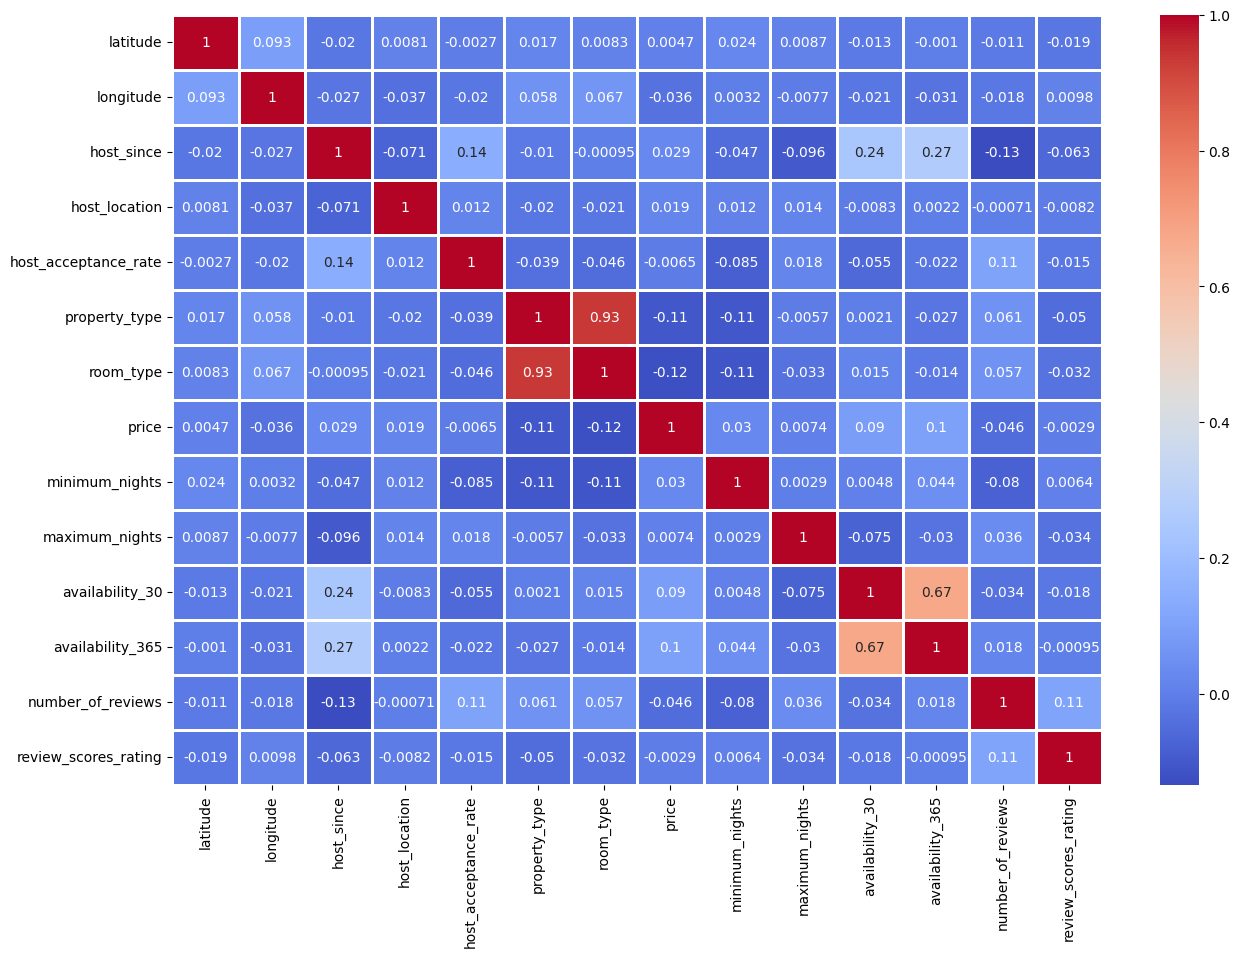

In [20]:
columns_to_excludes = ['zscore(reviews)','zscore(min)','zscore(max)']  # List of columns to exclude

# Create a new DataFrame without the excluded columns
df_subsets = df.drop(columns=columns_to_excludes)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df_subsets.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [21]:
for col in ["room_type","availability_30"]:
    del df[col]

NOW WE CAN START TRAINING

In [22]:
from sklearn.model_selection import train_test_split
y=df['price']
x=df.drop(['price'], axis=1)
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size=0.40,random_state=101)

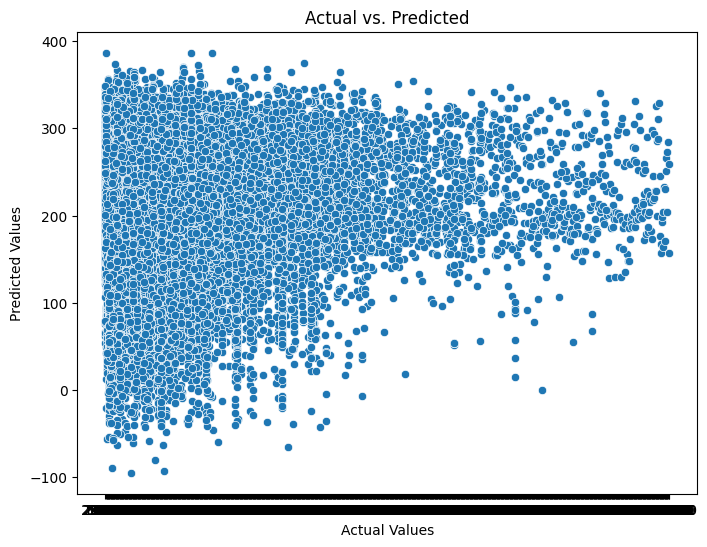

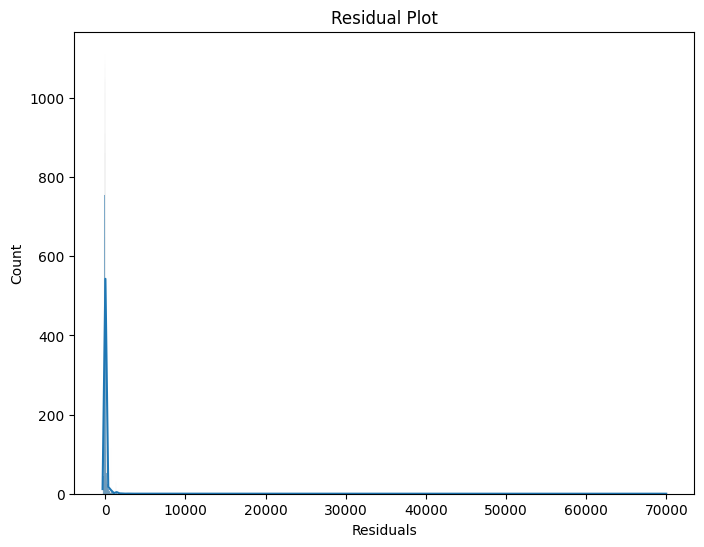

In [23]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
prediction=lm.predict(x_test)
y_test = y_test.ravel()
prediction = prediction.ravel()

dp = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

y_test = pd.to_numeric(y_test, errors='coerce')
prediction = pd.to_numeric(prediction, errors='coerce')

# Create scatterplot to visualize the predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=dp)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# You can also create other plots to further analyze the predictions
# For example, you can create a residual plot to check for model errors
residuals = y_test - prediction
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Plot')
plt.xlabel('Residuals')
plt.show()

In [24]:
x=df.loc[:, ['latitude','longitude','host_acceptance_rate','host_since','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_rating','host_location','property_type']].values
y=df.loc[:, ['price']].values
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.40, random_state=101)


In [25]:
from sklearn import metrics
mse= metrics.mean_squared_error (y_test, prediction)
y_test = y_test.ravel()
prediction = prediction.ravel()
y_test = pd.to_numeric(y_test, errors='coerce')
print('MAE:', metrics.mean_absolute_error (y_test, prediction)) 
print(f'MSE: {mse}')
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

target_variance = np.var(y_test)

# Print both the MSE and the variance
print(f'Variance of Target Variable: {target_variance}')

# Compare the MSE to the variance
if mse < target_variance:
    print('MSE is smaller than the variance, indicating your model is capturing some of the variability.')
elif mse == target_variance:
    print('MSE is similar to the variance, suggesting your model captures some variation but may need improvement.')
else:
    print('MSE is larger than the variance, indicating your model is not capturing the data well.')

MAE: 124.86729906004688
MSE: 300666.02787813277
RMSE: 548.3302179144724
Variance of Target Variable: 306366.4467126429
MSE is smaller than the variance, indicating your model is capturing some of the variability.
